
Average Salary by Education Level:
Education
0.0    42772.560680
1.0    45457.636563
2.0    59191.189094
3.0    74166.731265
Name: Salary, dtype: float64


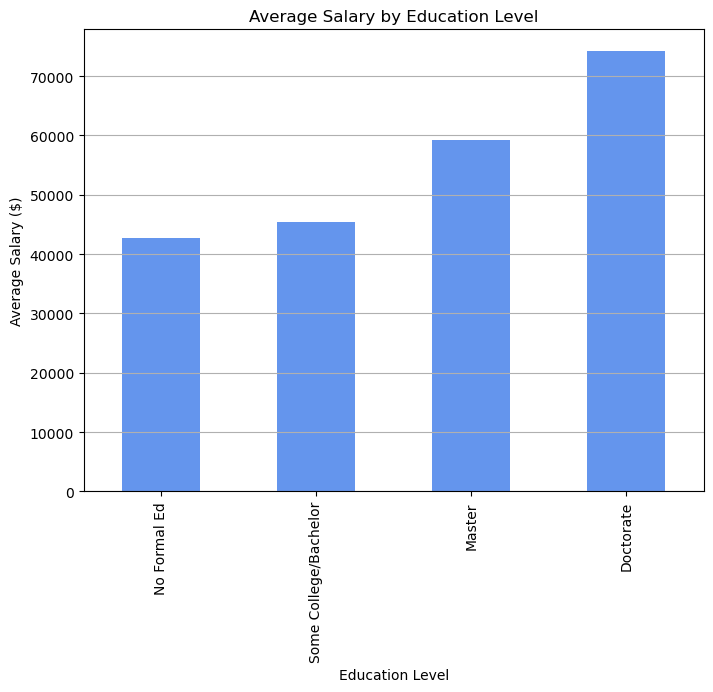


Alternative Learning Platform Usage (% of respondents):
Coursera                46.238938
edX                     13.741396
Kaggle Learn            29.252704
DataCamp                17.908063
Fast.ai                  5.813668
Udacity                 11.578171
Udemy                   28.970010
LinkedIn Learning       12.684366
Cloud Certifications     9.144543
University Online        0.000000
dtype: float64


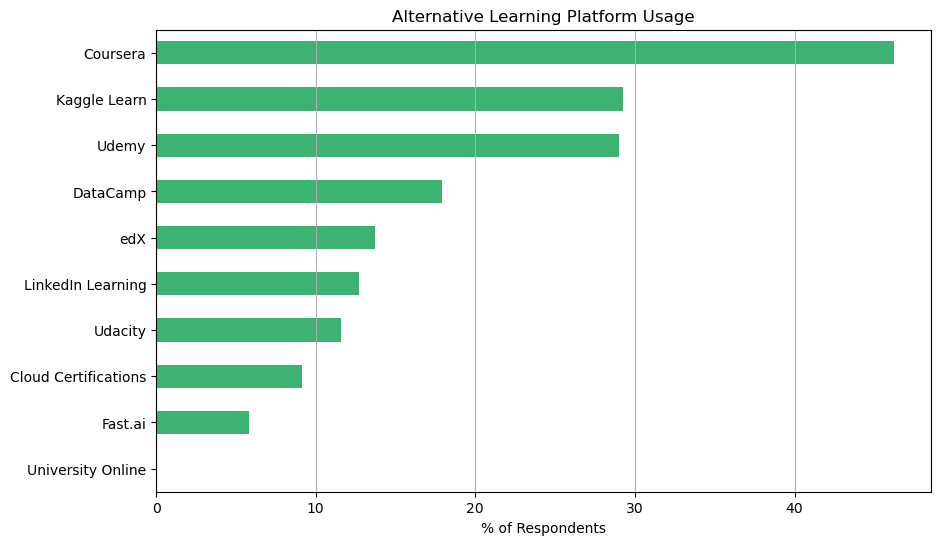

In [4]:
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 2. Load Data ---
df = pd.read_csv('/Users/medhavadlamaani/Downloads/kaggle_survey_2022_responses (1).csv', low_memory=False)

# Drop first row if necessary (survey repeated headers sometimes)
df = df.drop(0).reset_index(drop=True)

# --- 3. Rename Columns Properly ---
df = df.rename(columns={'Q8': 'Education', 'Q29': 'Salary'})

# --- 4. Clean Education Column ---
education_mapping = {
    'No formal education past high school': 0,
    'Some college/university study without earning a bachelor’s degree': 1,
    'Bachelor’s degree': 1,
    'Master’s degree': 2,
    'Doctoral degree': 3,
    'Professional doctorate': 3
}
df['Education'] = df['Education'].map(education_mapping).fillna(1)

# --- 5. Clean Salary Column ---
def convert_salary(value):
    if pd.isnull(value):
        return np.nan
    value = str(value).replace('$', '').replace(',', '').strip()
    if value.startswith('>'):
        num = ''.join(filter(str.isdigit, value))
        return float(num) * 1.25 if num else np.nan
    if '-' in value:
        parts = value.split('-')
        try:
            low = int(parts[0])
            high = int(parts[1])
            return (low + high) / 2
        except:
            return np.nan
    try:
        return float(value)
    except:
        return np.nan

df['Salary'] = df['Salary'].apply(convert_salary)

# Drop rows where Salary is NaN
df = df.dropna(subset=['Salary'])

# --- 6. Analyze Salary by Education Level ---
edu_salary = df.groupby('Education')['Salary'].mean()
print("\nAverage Salary by Education Level:")
print(edu_salary)

# Plot Average Salary vs Education
plt.figure(figsize=(8,6))
edu_salary.plot(kind='bar', color='cornflowerblue')
plt.title('Average Salary by Education Level')
plt.ylabel('Average Salary ($)')
plt.xlabel('Education Level')
plt.xticks(ticks=[0,1,2,3], labels=['No Formal Ed', 'Some College/Bachelor', 'Master', 'Doctorate'])
plt.grid(axis='y')
plt.show()

# --- 7. Analyze Alternative Learning Usage ---
alt_learning_cols = [
    'Q6_1',  # Coursera
    'Q6_2',  # edX
    'Q6_3',  # Kaggle Learn
    'Q6_4',  # DataCamp
    'Q6_5',  # fast.ai
    'Q6_6',  # Udacity
    'Q6_7',  # Udemy
    'Q6_8',  # LinkedIn Learning
    'Q6_9',  # Cloud Certifications
    'Q6_11'  # University Online Degree Courses
]

# Calculate percentage usage
alt_learning_usage = df[alt_learning_cols].notnull().mean() * 100

# Rename for clean plot
alt_learning_usage.index = [
    'Coursera', 'edX', 'Kaggle Learn', 'DataCamp', 'Fast.ai',
    'Udacity', 'Udemy', 'LinkedIn Learning', 'Cloud Certifications', 'University Online'
]

print("\nAlternative Learning Platform Usage (% of respondents):")
print(alt_learning_usage)

# Plot Alternative Learning Usage
plt.figure(figsize=(10,6))
alt_learning_usage.sort_values().plot(kind='barh', color='mediumseagreen')
plt.title('Alternative Learning Platform Usage')
plt.xlabel('% of Respondents')
plt.grid(axis='x')
plt.show()


Average Salary (Formal Education): $57,529.01
Average Salary (No Formal Education): $42,772.56


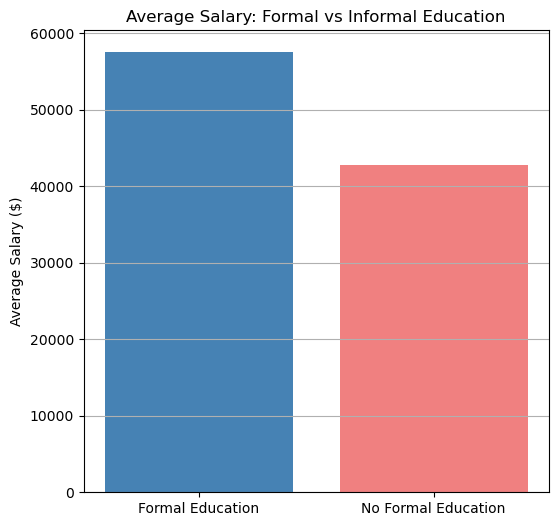

In [6]:
# --- Formal vs Informal Salary Comparison ---

# 1. Group people into Formal vs Informal
formal_df = df[df['Education'].isin([1,2,3])]   # Some College/Bachelor, Master, Doctorate
informal_df = df[df['Education'] == 0]           # No formal education past high school

# 2. Calculate average salaries
avg_salary_formal = formal_df['Salary'].mean()
avg_salary_informal = informal_df['Salary'].mean()

print(f"Average Salary (Formal Education): ${avg_salary_formal:,.2f}")
print(f"Average Salary (No Formal Education): ${avg_salary_informal:,.2f}")

# 3. Plot comparison
plt.figure(figsize=(6,6))
plt.bar(['Formal Education', 'No Formal Education'], [avg_salary_formal, avg_salary_informal], color=['steelblue', 'lightcoral'])
plt.title('Average Salary: Formal vs Informal Education')
plt.ylabel('Average Salary ($)')
plt.grid(axis='y')
plt.show()
